## NLCD Land Cover
Intantiate and retrieve the data from the NLCD Land Cover Icechunk repo. Print and plot the data.

### Retrieve data

In [4]:
import boto3
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [5]:
# before running this cell, make sure you created a .env file in this directory with your AWS credentials in it
load_dotenv()

True

In [6]:
from icefabric_tools.icechunk import IcechunkS3Repo, NGWPCLocations

# Retrive data and print
land_cover_repo = IcechunkS3Repo(location=NGWPCLocations.NLCD_IC.path)
lc_data = land_cover_repo.retrieve_dataset()
print(lc_data)

<xarray.Dataset> Size: 874GB
Dimensions:  (year: 39, Y: 105000, X: 160000, Y1: 52500, X1: 80000, Y2: 26250,
              X2: 40000, Y3: 13125, X3: 20000, Y4: 6563, X4: 10000, Y5: 3282,
              X5: 5000, Y6: 1641, X6: 2500)
Coordinates:
  * year     (year) int32 156B 1985 1986 1987 1988 1989 ... 2020 2021 2022 2023
Dimensions without coordinates: Y, X, Y1, X1, Y2, X2, Y3, X3, Y4, X4, Y5, X5,
                                Y6, X6
Data variables:
    0        (year, Y, X) uint8 655GB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    1        (year, Y1, X1) uint8 164GB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    2        (year, Y2, X2) uint8 41GB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    3        (year, Y3, X3) uint8 10GB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    4        (year, Y4, X4) uint8 3GB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    5        (year, Y5, X5) uint8 640MB dask.array<chunksize=(1, 512, 512), meta=np.n

/home/farshid.rahmani/Documents/GitHub/hydrofabric-ui/icechunk_data_viewer/.venv/lib/python3.11/site-packages/numcodecs/zarr3.py:145: UserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)
/home/farshid.rahmani/Documents/GitHub/hydrofabric-ui/icechunk_data_viewer/.venv/lib/python3.11/site-packages/numcodecs/zarr3.py:145: UserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)
/home/farshid.rahmani/Documents/GitHub/hydrofabric-ui/icechunk_data_viewer/.venv/lib/python3.11/site-packages/numcodecs/zarr3.py:145: UserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)
/home/farshid.rahmani/Documents/GitHub/hydrofabric-ui/icechunk_data_viewer/.venv/lib/python3.11/site-pa

### Plot 2023 data

<xarray.DataArray '5' (Y5: 3282, X5: 5000)> Size: 16MB
dask.array<getitem, shape=(3282, 5000), dtype=uint8, chunksize=(512, 512), chunktype=numpy.ndarray>
Coordinates:
    year     int32 4B 2023
Dimensions without coordinates: Y5, X5


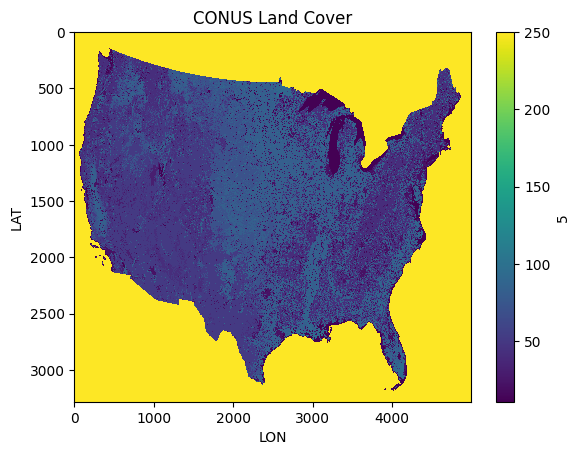

In [13]:
# Print data for year 2023
print(lc_data['5'].sel(year=2023))

# Set up plot for 2023 land cover
lc_data['5'].sel(year=2023).plot(x='X5', y='Y5')

# Invert the y-axis to show the CONUS region correctly
plt.gca().invert_yaxis()

# Add labels and show the plot
plt.xlabel("LON")
plt.ylabel("LAT")
plt.title("CONUS Land Cover")
plt.show()

## Topobathy
Intantiate and retrieve the data from one Topobathy Icechunk repo. Print and plot the data.

### Retrieve Data

In [8]:
# Retrive data and print
topo_repo = IcechunkS3Repo(location=NGWPCLocations.TOPO_PR_USVI_30M_IC.path)
topo_data = topo_repo.retrieve_dataset()
print(topo_data)

<xarray.Dataset> Size: 681MB
Dimensions:                        (band: 1, y: 6304, x: 13504)
Coordinates:
  * y                              (y) float64 50kB 19.0 19.0 ... 17.25 17.25
  * x                              (x) float64 108kB -68.0 -68.0 ... -64.25
    spatial_ref                    int64 8B 0
  * band                           (band) int64 8B 1
Data variables:
    __xarray_dataarray_variable__  (band, y, x) float64 681MB dask.array<chunksize=(1, 394, 844), meta=np.ndarray>


### Plot Data

<xarray.DataArray '__xarray_dataarray_variable__' (band: 1, y: 6304, x: 13504)> Size: 681MB
dask.array<open_dataset-__xarray_dataarray_variable__, shape=(1, 6304, 13504), dtype=float64, chunksize=(1, 394, 844), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 50kB 19.0 19.0 19.0 19.0 ... 17.25 17.25 17.25
  * x            (x) float64 108kB -68.0 -68.0 -68.0 ... -64.25 -64.25 -64.25
    spatial_ref  int64 8B 0
  * band         (band) int64 8B 1
Attributes: (12/13)
    DataType:                Generic
    AREA_OR_POINT:           Area
    RepresentationType:      ATHEMATIC
    STATISTICS_COUNT:        64069221.0
    STATISTICS_COVARIANCES:  2043434.806372322
    STATISTICS_MAXIMUM:      1328.0447998047
    ...                      ...
    STATISTICS_MEDIAN:       -1039.828272
    STATISTICS_MINIMUM:      -6616.7924804688
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       1429.4876027347
    units:                   metre


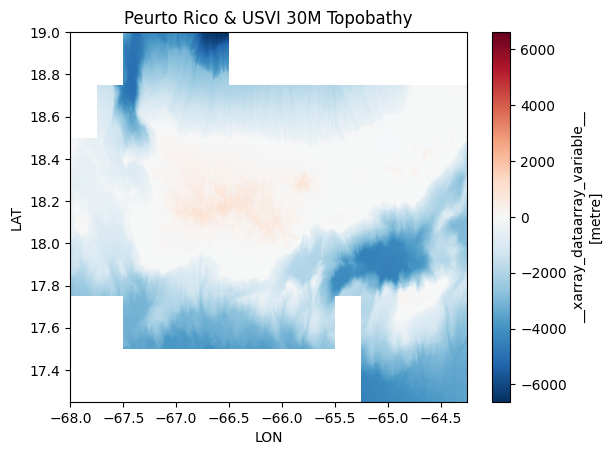

In [9]:
# Print Dataarray
print(topo_data['__xarray_dataarray_variable__'])

# Set up plot
topo_data['__xarray_dataarray_variable__'].plot(x='x', y='y')

# Add labels and show the plot
plt.xlabel("LON")
plt.ylabel("LAT")
plt.title("Puerto Rico & USVI 30M Topobathy")
plt.show()